# Classification Model Comparison

The purpose of this notebook is to determine which model performs best on our human labeled data. 

The overall best model will be the one with the best score with the least overfitting. 

In [11]:
import pickle

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report

from yellowbrick.classifier import ConfusionMatrix, ROCAUC

import matplotlib.pyplot as plt
%matplotlib inline

# Model Import

Model 1 - Random Forest trained on a limited amount of human labeled data

Model 2 - XGBoost trained on a larger set synthetic data (labeled by model 1)

In [2]:
with open("../models/rf_classifier_v1.pkl", "rb") as model:
    rf_model = pickle.load(model)
    
with open("../models/xg_model_semisupervised_v2.pkl", "rb") as model:
    xg_model = pickle.load(model)

# Data Import

The data imported here has all been hand labeled (no synthetic data)

In [4]:
labeled_df = pd.read_csv("../data/user_labeled/final_labeled.csv")

X = labeled_df.drop(["node", "label", "similarity_rank"], axis=1).dropna()
y = labeled_df.label

# Model Comparison

In [8]:
y_preds_mod_1 = rf_model.predict(X)

y_preds_mod_2 = xg_model.predict(X)

print("MODEL 1:\n", classification_report(y, y_preds_mod_1), "\n\n")
print("MODEL 2:\n", classification_report(y, y_preds_mod_2))

MODEL 1:
               precision    recall  f1-score   support

       after       0.87      0.90      0.88       231
      before       0.83      0.79      0.81       144

    accuracy                           0.86       375
   macro avg       0.85      0.84      0.85       375
weighted avg       0.86      0.86      0.86       375
 


MODEL 2:
               precision    recall  f1-score   support

       after       0.78      0.70      0.74       231
      before       0.59      0.69      0.63       144

    accuracy                           0.70       375
   macro avg       0.69      0.69      0.69       375
weighted avg       0.71      0.70      0.70       375



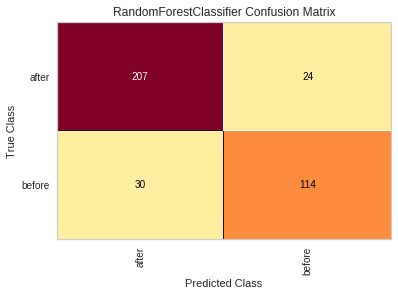

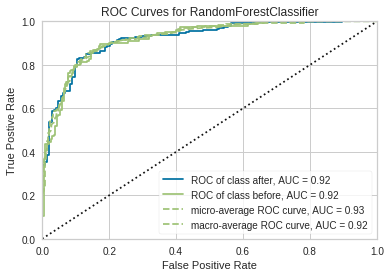

In [22]:
cm1 = ConfusionMatrix(rf_model, classes=rf_model.classes_, is_fitted=True)
vis1 = ROCAUC(rf_model, classes=rf_model.classes_, is_fitted=True)

cm1.score(X, y)
cm1.poof()

vis1.score(X, y)
vis1.poof()

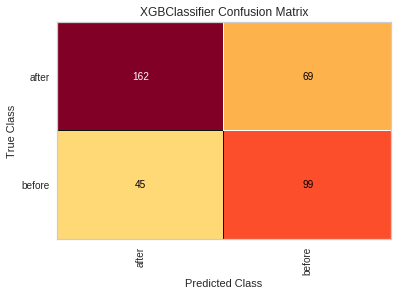

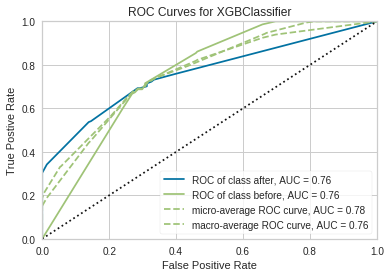

In [24]:
cm2 = ConfusionMatrix(xg_model, classes=xg_model.classes_, is_fitted=True)
vis2 = ROCAUC(xg_model, classes=xg_model.classes_, is_fitted=True)

cm2.score(X, y)
cm2.poof()

vis2.score(X, y)
vis2.poof()

___

Based on the observed results, it appears that the first model (random forest) trained on only the hand labeled data has better results in both performance and lack of overfitting. 